# Exercises_05 - Pandas exercises

This week we will work with the `pandas` library for data analysis.
The reference guide for numpy can be found here: https://pandas.pydata.org/docs/. 

## Revisiting the BMI dataset

Last week we utilised numpy and represented a BMI dataset (from Kaggle) in text form.
Whilst it does populate the numpy array with the data, the formatting is harder to read with the 'b' prefix and misalignment of columns.


In [3]:
import numpy as np
import os

# Import `height-weight` keeping the text column intact.
url = os.path.join('..', 'datasets', '500_Person_Gender_Height_Weight_Index.csv')
hw_dataset = np.genfromtxt(url, delimiter=',', names=True, dtype='object')
hw_dataset

array([(b'Male', b'174', b'96', b'4'), (b'Male', b'189', b'87', b'2'),
       (b'Female', b'185', b'110', b'4'),
       (b'Female', b'195', b'104', b'3'), (b'Male', b'149', b'61', b'3'),
       (b'Male', b'189', b'104', b'3'), (b'Male', b'147', b'92', b'5'),
       (b'Male', b'154', b'111', b'5'), (b'Male', b'174', b'90', b'3'),
       (b'Female', b'169', b'103', b'4'), (b'Male', b'195', b'81', b'2'),
       (b'Female', b'159', b'80', b'4'),
       (b'Female', b'192', b'101', b'3'), (b'Male', b'155', b'51', b'2'),
       (b'Male', b'191', b'79', b'2'), (b'Female', b'153', b'107', b'5'),
       (b'Female', b'157', b'110', b'5'), (b'Male', b'140', b'129', b'5'),
       (b'Male', b'144', b'145', b'5'), (b'Male', b'172', b'139', b'5'),
       (b'Male', b'157', b'110', b'5'), (b'Female', b'153', b'149', b'5'),
       (b'Female', b'169', b'97', b'4'), (b'Male', b'185', b'139', b'5'),
       (b'Female', b'172', b'67', b'2'), (b'Female', b'151', b'64', b'3'),
       (b'Male', b'190', b'95', b'

# Pandas Series


In [4]:
import pandas as pd

# pd.Series(
#    data=None,
#    index=None,
#    dtype: 'Dtype | None' = None,
#    name=None,
#    copy: 'bool' = False,
#    fastpath: 'bool' = False,
#)

ser1 = pd.Series([0,1,2,3], ["a", "b", "c", "d"], None, "Test series" )
ser1

#To utilise like a dictionary / hash table:
#ser1["a"]



a    0
b    1
c    2
d    3
Name: Test series, dtype: int64

# Using the BMI data in the Series

We can also utilise the numpy arrays we set up last week for the data and labels of the BMI dataset.  

In [5]:
hw_data = np.array([list(row)[1] for row in hw_dataset])
hw_labels = np.array([list(row)[0] for row in hw_dataset])

ser2 = pd.Series(hw_data, hw_labels)
ser2



b'Male'      b'174'
b'Male'      b'189'
b'Female'    b'185'
b'Female'    b'195'
b'Male'      b'149'
              ...  
b'Female'    b'150'
b'Female'    b'184'
b'Female'    b'141'
b'Male'      b'150'
b'Male'      b'173'
Length: 500, dtype: bytes24

# Exercise 1
Now we are going to utilise pandas' methods to represent this data in a data frame (df). By default the formatting of the output will be easier to read. We can also utilise pandas methods to perform data analysis.

Start by running the code below to check that bmi dataframe has been populated by 'reading the csv'.

In [6]:
import pandas as pd
bmi_df = pd.read_csv("../datasets/500_Person_Gender_Height_Weight_Index.csv")
bmi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


Now utilise pandas' sample method to show only five rows of the BMI data set.
Play around with the parameters of the sample method, and observe the results. 

From the documentation (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html):


DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)

In [7]:
bmi_df.sample(4)

,Gender,Height,Weight,Index
134,Female,171,155,5
464,Female,181,80,2
211,Male,148,155,5
174,Male,197,149,4


# Exercise 2 - Titanic dataset

In [8]:
titanic_df = pd.read_csv("../datasets/titanic-dataset.csv")

In [9]:
import os


In [10]:
os.path.abspath(os.path.join("..", "..", "..", "GitHub/PP4DSP1-test/datasets", "titanic-dataset.csv"))

'/Users/nick/Documents/GitHub/PP4DSP1-test/datasets/titanic-dataset.csv'

In [11]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
titanic_df["Age Filled"] = titanic_df.Age.fillna(titanic_df.Age.median())

# Select columns of the dataframe 

Like indexed structures we can get access to single columns, or multiple columns (if we pass in as an array).


In [33]:
titanic_df["Survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [17]:
titanic_df[["Survived", "Fare"]]

,Survived,Fare
0,0,7.2500
1,1,71.2833
2,1,7.9250
3,1,53.1000
4,0,8.0500
...,...,...
886,0,13.0000
887,1,30.0000
888,0,23.4500
889,1,30.0000


# Select rows

In [37]:
titanic_df.iloc[886]

PassengerId                      887
Survived                           0
Pclass                             2
Name           Montvila, Rev. Juozas
Sex                             male
Age                             27.0
SibSp                              0
Parch                              0
Ticket                        211536
Fare                            13.0
Cabin                            NaN
Embarked                           S
Age Filled                      27.0
Name: 886, dtype: object

In [49]:
#df = pd.DataFrame()
#df.loc['1']

# Smaller Sample Size

In [19]:
titanic_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Filled
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.1250,NaN,Q,4.0
776,777,0,3,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.7500,F38,Q,28.0
183,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S,1.0
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.0,1,1,17421,110.8833,C68,C,39.0
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,28.0
396,397,0,3,"Olsson, Miss. Elina",female,31.0,0,0,350407,7.8542,NaN,S,31.0
417,418,1,2,"Silven, Miss. Lyyli Karoliina",female,18.0,0,2,250652,13.0000,NaN,S,18.0
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C,27.0
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,32.0
392,393,0,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,3101277,7.9250,NaN,S,28.0


# Check for null values



In [22]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age Filled       0
dtype: int64

In [34]:
first_t = titanic_df[["Survived", "Pclass"]]
middle_t = titanic_df[["Parch","Cabin"]]
end_t = titanic_df[["Name", "Age"]]


In [35]:
end_t

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
886,"Montvila, Rev. Juozas",27.0
887,"Graham, Miss. Margaret Edith",19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,"Behr, Mr. Karl Howell",26.0


# Joining columns in a custom dataframe

In [29]:
pd.concat([first_t, end_t], axis=0)

,Survived,Pclass,Name,Age
0,0.0,3.0,NaN,NaN
1,1.0,1.0,NaN,NaN
2,1.0,3.0,NaN,NaN
3,1.0,1.0,NaN,NaN
4,0.0,3.0,NaN,NaN
...,...,...,...,...
886,NaN,NaN,"Montvila, Rev. Juozas",27.0
887,NaN,NaN,"Graham, Miss. Margaret Edith",19.0
888,NaN,NaN,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,NaN,NaN,"Behr, Mr. Karl Howell",26.0


# Exploratory Data Analysis


<AxesSubplot:ylabel='Frequency'>

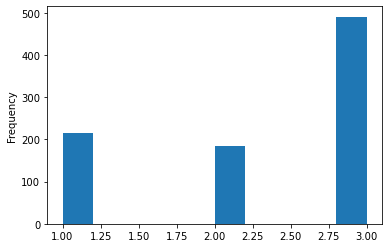

In [43]:
titanic_df["Pclass"].plot(kind = 'hist')

# Plotting the count of each gender which survived

<AxesSubplot:xlabel='Sex'>

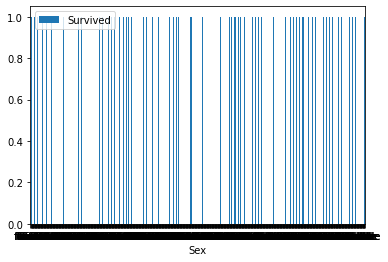

In [85]:
df = titanic_df[["Survived", "Sex"]]
#df

#malec = 0
#femalec = 0
#for i in df:
#    print(df['Sex'])

#    if(survived == 1 and sex == "male"):
#        malec +=1
#    if(survived == 1 and sex == "female"):
#        femalec +=1
        
#print(femalec)

titanic_df.plot.bar(x = 'Sex', y = 'Survived', rot=0)